"""
Created on Thurs Jul 7 2021

@author: daniellee

Script to graph peptides based on the residue range

"""

In [14]:
import pandas as pd
inhib = input("Plot G7-0P, G7-2P, G17-0P, G17-2P?")

if inhib in ['G7-0P','g7-0P','7-0P','G7-0p','g7-0p','7-0p','g70p','7-0']:
    raw_data = pd.read_csv('HDX_WT_G7_0P_FT_DL_Final_Data_Cluster.csv')
    protein = 'G7-0P'
elif inhib in ['G7-2P','g7-2P','7-2P','G7-2p','g7-2p','7-2p','g72p','7-2']:
    raw_data = pd.read_csv('HDX_WT_G7_2P_FT_DL_Final_Data_Cluster.csv')
    protein = 'G7-2P'
elif inhib in ['G17-0P','g17-0P','17-0P','G17-0p','g17-0p','17-0p','g170p','17-0']:
    raw_data = pd.read_csv('HDX_WT_G17_0P_FT_DL_Final_Data_Cluster.csv')
    protein = 'G17-0P'
elif inhib in ['G17-2P','g17-2P','17-2P','G17-2p','g17-2p','17-2p','g172p','17-2']:
    raw_data = pd.read_csv('HDX_WT_G17_2P_FT_DL_Final_Data_Cluster.csv')
    protein = 'G17-2P'

df = pd.DataFrame(raw_data)
display(raw_data)

Plot G7-0P, G7-2P, G17-0P, G17-2P? g17-2p


,Protein,Start,End,Sequence,Modification,Fragment,MaxUptake,MHP,State,Exposure,File,z,RT,Inten,Center
0,G17-2P,1,10,AAAAAAGPEM,NaN,NaN,8.0,859.3978,Apo-2P,0.000000,1142021JA_2Perk_UL1,1,4.060234,10317742.0,859.883597
1,G17-2P,1,10,AAAAAAGPEM,NaN,NaN,8.0,859.3978,Apo-2P,0.000000,1142021JA_2Perk_UL2,1,4.052950,10896670.0,859.869524
2,G17-2P,1,10,AAAAAAGPEM,NaN,NaN,8.0,859.3978,Apo-2P,0.001000,1152021JA_2Perk_apo_q,1,4.073631,9855878.0,860.308254
3,G17-2P,1,10,AAAAAAGPEM,NaN,NaN,8.0,859.3978,Apo-2P,0.500000,1152021JA_2Perk_apo_30s,1,4.068829,7110445.0,864.774574
4,G17-2P,1,10,AAAAAAGPEM,NaN,NaN,8.0,859.3978,Apo-2P,1.000000,1152021JA_2Perk_apo_1m,1,4.066907,7359160.0,864.886843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,G17-2P,349,357,ARFQPGYRS,NaN,NaN,7.0,1081.5538,G17-2P,16.000000,1192021JA_2Perk_G17_16m,2,3.422172,2357794.0,543.822252
3889,G17-2P,349,357,ARFQPGYRS,NaN,NaN,7.0,1081.5538,G17-2P,30.000002,1182021JA_2Perk_G17_30m,2,3.433396,2532563.0,543.819269
3890,G17-2P,349,357,ARFQPGYRS,NaN,NaN,7.0,1081.5538,G17-2P,60.000004,1182021JA_2Perk_G17_60m,2,3.429495,2693214.0,543.795846
3891,G17-2P,349,357,ARFQPGYRS,NaN,NaN,7.0,1081.5538,G17-2P,90.000008,1182021JA_2Perk_G17_90m,2,3.428394,2435139.0,543.810967



Input start residue:  1

Input end residue:  16

G or Apo?  g

Log or linear scale?  lin


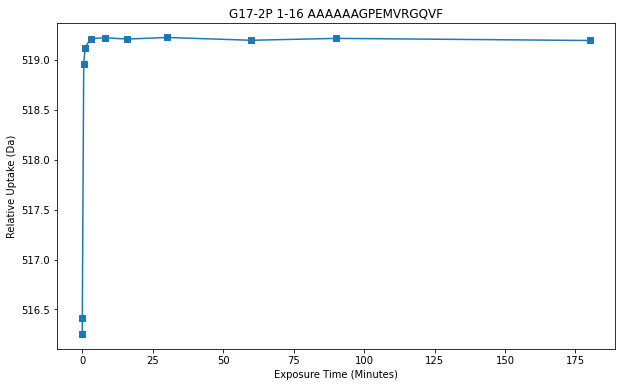

In [16]:
import matplotlib.pyplot as plt
import numpy as np

start = int(input("\nInput start residue: "))
end = int(input("\nInput end residue: "))
state = input("\nG or Apo? ")
scale = input("\nLog or linear scale? ")

if state in ['Apo', 'apo', 'a', 'A']:
    state = 'Apo-0P'
elif (state in ['G', 'g']) & (protein == 'G7-0P'):
    state = 'G7-0P'
elif (state in ['G', 'g']) & (protein == 'G7-2P'):
    state = '2P-G7'
elif (state in ['G', 'g']) & (protein == 'G17-0P'):
    state = 'G17-0P'
elif (state in ['G', 'g']) & (protein == 'G17-2P'):
    state = 'G17-2P'

sub_range = df[(df['Start'] == start) & (df['End'] == end) & (df['State'] == state)]
x = sub_range.iloc[:,9]
y = sub_range.iloc[:,14]
sequence = sub_range['Sequence'].values[3]
#print(sequence)

plt.figure(figsize = (10,6))
plt.plot(x, y, marker = 's')
plot_title = [protein, str(start) + "-" + str(end), sequence]
plt.title(" ".join(plot_title))
plt.ylabel("Relative Uptake (Da)")
plt.xlabel("Exposure Time (Minutes)")

if scale in ['log', 'Log']:
    plt.yscale('log')
    plt.xscale('log')
elif scale in ['linear', 'Linear', 'lin', 'Lin']:
    plt.yscale('linear')
    plt.xscale('linear')
    

plt.show()

